In [1]:
import importlib
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

In [2]:
import classes, utils, iv_models, svi_class
_ = importlib.reload(classes)
_ = importlib.reload(utils)
_ = importlib.reload(iv_models)
_ = importlib.reload(svi_class)

from classes import Ticker, TickerSet, OptionChain
from utils import get_errors_for_models
from iv_models import IVPolynomial, SVIModel, kernel_smoothening
from svi_class import SVIClass

In [3]:
# ts = TickerSet("20210805 15:15:00", "20210806 10:00:00")#, tickers=['INDHOTEL', 'INDIGO', 'INDUSINDBK', 'INDUSTOWER', 'INFY', 'IOC'])
ts = TickerSet("20210805 15:15:00", "20210806 10:00:00", tickers=['HDFCBANK'])
# ts = TickerSet("20210805 15:15:00", "20210806 10:00:00", tickers=['RELIANCE', 'INDHOTEL', 'INDIGO', 'INDUSINDBK', 'INDUSTOWER', 'INFY', 'IOC'])

globbing ./data/*/*_HDFCBANK21AUG*.csv
loading data from ./data/20210805/influxOP_HDFCBANK21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_HDFCBANK21AUG_20210806.csv
2021-08-26 20:00:00


In [4]:
oc_pairs = ts.get_option_chain_pairs()

In [5]:
oc1 = oc_pairs['HDFCBANK'][0]
oc2 = oc_pairs['HDFCBANK'][1]

model1 = SVIModel()
model2 = SVIModel()

oc1.fit_iv_model(model1)
oc2.fit_iv_model(model2)

array([ 0.00703335,  0.00249007,  0.00512649,  0.00013521, -0.00452367,
       -0.00915768, -0.01952967, -0.02042971, -0.01347616, -0.00526578,
        0.00525316,  0.00791145,  0.00762851,  0.00627911,  0.00883904,
        0.00855545,  0.00594582,  0.00449652,  0.00478387,  0.0052802 ,
        0.00132413, -0.01975147])

In [6]:
model1.params, model2.params

([-0.004549704823005055,
  0.05262673862364252,
  0.09123440941523331,
  0.00705375637521115,
  0.12112706019212183],
 [-0.005977401202862068,
  0.05528118734613501,
  0.10540454553727226,
  0.01328848121185711,
  0.14535611259196357])

In [7]:
max_moneyness=0.15
moneys  = np.linspace(-max_moneyness, max_moneyness, num=int(5))
strikes = oc1.future_price() * np.exp(moneys)
res1    = oc1.ivs_prices_greeks(strikes)
res1

,strike,futPrice,moneyness,instrument,time_to_expiry,fit_iv,delta,gamma,theta,vega,fit_price,moneyness,greek_0,greek_1,greek_2,greek_3,greek_4
0,128077.650432,148805.0,0.150,p,0.058076,0.297327,-0.016616,0.000004,-3795.220240,1482.610549,65.118567,0.150,28.956265,5.328199,-0.239330,1.067653,0.930649
1,138052.869483,148805.0,0.075,p,0.058076,0.217834,-0.072843,0.000018,-9310.148034,4964.267705,258.853200,0.075,39.523104,5.486476,-0.170670,0.976783,1.722048
2,148805.000000,148805.0,0.000,p,0.058076,0.176137,-0.491534,0.000063,-21689.681397,14302.984571,2519.661264,0.000,48.879408,5.899193,-0.018145,-0.085142,2.568013
3,160394.551072,148805.0,-0.075,c,0.058076,0.230497,0.093012,0.000020,-11841.672973,5967.220812,350.713668,-0.075,37.351796,5.419070,0.133562,-1.141029,1.714393
4,172886.744489,148805.0,-0.150,c,0.058076,0.321344,0.028831,0.000006,-6531.440807,2360.817418,124.589091,-0.150,26.792044,5.369285,0.201551,-1.204356,0.911521


In [8]:
oc1.estimate_price_diff_df(oc2, max_moneyness=0.02)

,delta_price,gamma_price,theta_price,vol_0_price,vol_1_price,vol_2_price,vol_3_price,vol_4_price,estimated_price_diff,actual_price_diff,abs_pricing_error,delta_exposure,%_pe_delta_exposure,%_pe_option_price
moneyness,,,,,,,,,,,,,,
-0.02,-85.399291,2.055100,-41.825672,-874.924982,197.877976,-12.363545,25.485287,762.617755,-26.477371,53.288260,79.765631,-46634.280464,0.171045,6.023433
-0.01,-108.660788,2.266552,-44.978931,-964.947163,216.663609,-8.595442,10.685234,853.391422,-44.175508,40.025736,84.201243,-59336.765368,0.141904,4.579153
0.00,-133.942928,2.344502,-46.421321,-998.133117,223.971961,-3.677507,-7.592508,889.939207,-73.511712,12.205231,85.716943,-73142.669368,0.117191,3.401923
0.01,113.414988,2.268621,-45.893659,-965.828236,218.057185,1.486323,-25.648427,862.339920,160.196717,243.969440,83.772723,61932.907698,0.135264,4.453415
0.02,90.497624,2.065621,-43.658276,-879.404192,201.106172,5.946712,-39.917825,780.960387,117.596224,196.052033,78.455809,49418.344753,0.158758,5.623058


In [13]:
df = oc1.estimate_price_diff_df(oc2, max_moneyness=0.02)
df['vol_prices'] = df['vol_0_price'] +  df['vol_1_price'] +  df['vol_2_price'] +  df['vol_3_price'] +  df['vol_4_price']
df['wout_vol'] = df['delta_price'] + df['gamma_price'] + df['theta_price']
df['fac'] = (df['actual_price_diff'] - df['wout_vol'])/df['vol_prices']
df['vol_would_be'] = (df['actual_price_diff'] - df['wout_vol'])

In [14]:
df

,delta_price,gamma_price,theta_price,vol_0_price,vol_1_price,vol_2_price,vol_3_price,vol_4_price,estimated_price_diff,actual_price_diff,abs_pricing_error,delta_exposure,%_pe_delta_exposure,%_pe_option_price,vol_prices,wout_vol,fac,vol_would_be
moneyness,,,,,,,,,,,,,,,,,,
-0.02,-85.399291,2.055100,-41.825672,-874.924982,197.877976,-12.363545,25.485287,762.617755,-26.477371,53.288260,79.765631,-46634.280464,0.171045,6.023433,98.692492,-125.169862,1.808224,178.458122
-0.01,-108.660788,2.266552,-44.978931,-964.947163,216.663609,-8.595442,10.685234,853.391422,-44.175508,40.025736,84.201243,-59336.765368,0.141904,4.579153,107.197660,-151.373168,1.785477,191.398903
0.00,-133.942928,2.344502,-46.421321,-998.133117,223.971961,-3.677507,-7.592508,889.939207,-73.511712,12.205231,85.716943,-73142.669368,0.117191,3.401923,104.508035,-178.019747,1.820195,190.224978
0.01,113.414988,2.268621,-45.893659,-965.828236,218.057185,1.486323,-25.648427,862.339920,160.196717,243.969440,83.772723,61932.907698,0.135264,4.453415,90.406766,69.789951,1.926620,174.179488
0.02,90.497624,2.065621,-43.658276,-879.404192,201.106172,5.946712,-39.917825,780.960387,117.596224,196.052033,78.455809,49418.344753,0.158758,5.623058,68.691255,48.904969,2.142151,147.147064


In [ ]:
oc1.time_to_expiry(), 1/oc1.time_to_expiry(), np.sqrt(oc1.time_to_expiry()), 1.0/np.sqrt(oc1.time_to_expiry())

In [ ]:
oc1.df.fit_iv, 1.0/oc1.df.fit_iv

In [ ]:
oc1 = oc_pairs['HDFCBANK'][0]
oc2 = oc_pairs['HDFCBANK'][1]

model1 = IVPolynomial()
model2 = IVPolynomial()

oc1.fit_iv_model(model1)
oc2.fit_iv_model(model2)

In [ ]:
max_moneyness=0.15
moneys  = np.linspace(-max_moneyness, max_moneyness, num=int(5))
strikes = oc1.future_price() * np.exp(moneys)
res1    = oc1.ivs_prices_greeks(strikes)
res1

In [ ]:
oc1.estimate_price_diff_df(oc2, max_moneyness=0.02)

In [ ]:
df = oc1.estimate_price_diff_df(oc2, max_moneyness=0.02)
df['vol_prices'] = df['vol_0_price'] +  df['vol_1_price'] +  df['vol_2_price']
df['wout_vol'] = df['delta_price'] + df['gamma_price'] + df['theta_price']
df

In [ ]:
oc1.time_to_expiry()

In [9]:
oc_pairs = ts.get_option_chain_pairs()

model_1 = IVPolynomial(2)
model_2 = SVIModel()
# model_2 = IVPolynomial(2, smoothening="kernel_smoothening")
# model_3 = IVPolynomial(2, weighting="inverse_spread")
# model_4 = IVPolynomial(2, smoothening="kernel_smoothening", weighting="inverse_spread")

models = [model_1, model_2]
# models = [model_1, model_2, model_3, model_4]

In [10]:
model_errors = get_errors_for_models(oc_pairs, models)

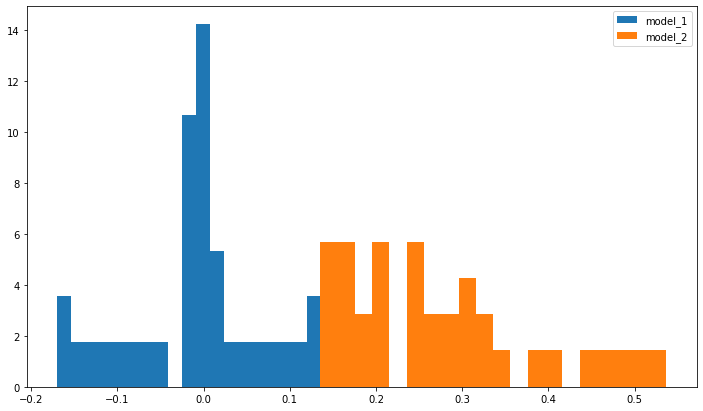

In [11]:
fig, axs = plt.subplots(1, 1)
fig.set_size_inches(12, 7)

for tickerwise_e, aggregated_e in model_errors:
    axs.hist(aggregated_e['ALL'], density=True, bins=20)
axs.legend([f'model_{i+1}' for i in range(len(model_errors))])

In [12]:
rows = []
for i, (tickerwise_e, aggregated_e) in enumerate(model_errors):
    row = {
        'model': f'model_{i+1}',
        'pricing_mae' : np.mean(np.abs(aggregated_e['ALL'])),
        'pricing_rmse' : np.sqrt(np.mean((aggregated_e['ALL'])**2)),
        'fit_mae' : np.mean(np.abs(np.array(aggregated_e['fit_errors']))),
        'fit_rmse' : np.sqrt(np.mean((np.array(aggregated_e['fit_errors']))**2)),
    } 
    rows.append(row)

pd.DataFrame(rows)

,model,pricing_mae,pricing_rmse,fit_mae,fit_rmse
0,model_1,0.058377,0.080055,0.008094,0.009944
1,model_2,0.275441,0.297790,0.006395,0.008191


In [ ]:
oc_pairs['RELIANCE'][0].df

In [ ]:
s = [1]
s.extend(np.array([2, 3]))
s

In [ ]:
kernel_smoothening(oc_pairs['IDEA'][0])

In [ ]:
oc_pairs